Использую бетта распределение (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.beta.html#scipy.stats.beta, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html#scipy.stats.beta, https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import beta
%matplotlib inline

In [2]:
#назначим параметры распределения
a=0.5
b=0.7

# сгенерируем выборку из 1000 значений
sample = beta.rvs(a, b, size=1000)

Text(0.5, 0, '$x$')

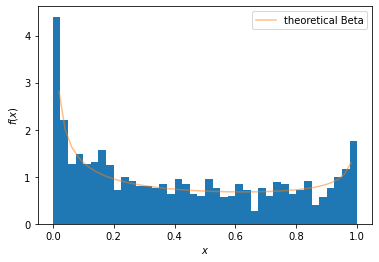

In [3]:
#построим гистограмму выборки и теоретическую плотность бета распределения на одном графике
#гистограмма:
plt.hist(sample,bins=40, density=True)

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,1,50)
pdf = beta.pdf(x, a, b)
plt.plot(x, pdf, label='theoretical Beta', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [4]:
#напишем функцию для создания выборки 1000 средних из 1000 выборок исходного распределения объема N
def mean_expected_value_sample(dist_func, size):
    mev_sample = []
    samples = beta.rvs(a, b, size=(1000, size))
    for sample in samples:
        mev_sample.append(sample.mean())
    return mev_sample

In [5]:
#сделаем выборки 1000 средних из распределений объема 5, 10,50
mev_sample_5 = mean_expected_value_sample(beta, 5)
mev_sample_10 = mean_expected_value_sample(beta, 10)
mev_sample_50 = mean_expected_value_sample(beta, 50)

In [6]:
#из википедии возьмем формулы для математичекого ожидания и дисперсии бета распределения
#Посчитаем МО и Д для нормального распределения приближающего значение МО по ЦПТ, взяв теоретические значения параметров a и b
mu = a / (a+b)
disp = (a*b) / (((a+b)**2) * (a+b+1))
sigma = lambda n: (disp / n) ** 0.5

Text(0.5, 0, '$x$')

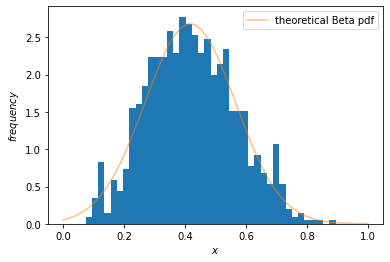

In [7]:
#на одной оси построим распределение 1000 средних из 1000 выборок бета распределения объема 5 и теоретическую функцию плотности распределение средних бета распределения по ЦПТ
sigma_5 = sigma(5)

#гистограмма
plt.hist(mev_sample_5,bins=40, density=True)

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,1,50)
pdf = sts.norm(loc=mu, scale=sigma_5).pdf(x)
plt.plot(x, pdf, label='theoretical Beta pdf', alpha=0.5)
plt.legend()
plt.ylabel('$frequency$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

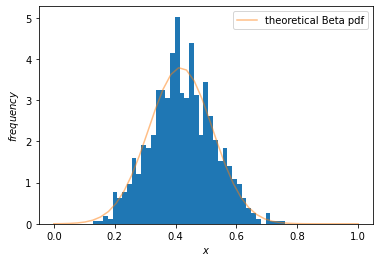

In [8]:
#на одной оси построим распределение 1000 средних из 1000 выборок бета распределения объема 10 и теоретическую функцию плотности распределение средних бета распределения по ЦПТ
sigma_10 = sigma(10)

#гистограмма
plt.hist(mev_sample_10,bins=40, density=True)

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,1,40)
pdf = sts.norm(loc=mu, scale=sigma_10).pdf(x)
plt.plot(x, pdf, label='theoretical Beta pdf', alpha=0.5)
plt.legend()
plt.ylabel('$frequency$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

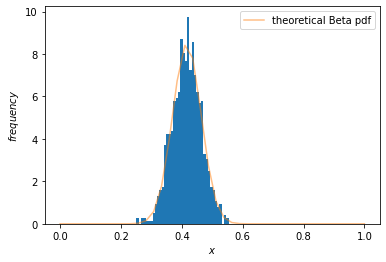

In [9]:
#на одной оси построим распределение 1000 средних из 1000 выборок бета распределения объема 50 и теоретическую функцию плотности распределение средних бета распределения по ЦПТ
sigma_50 = sigma(50)

#гистограмма
plt.hist(mev_sample_50,bins=40, density=True)

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,1,40)
pdf = sts.norm(loc=mu, scale=sigma_50).pdf(x)
plt.plot(x, pdf, label='theoretical Beta pdf', alpha=0.5)
plt.legend()
plt.ylabel('$frequency$')
plt.xlabel('$x$')

**Вывод:** с ростом объема исходных выборок среднеквадратичное отклонение выборки средних уменьшается, а сама выборка средних лучше приближает истинное значение среднего исходной выборки